In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
dataset = pd.read_csv(r"C:\Users\dkber\Downloads\tips (data for regression problem).csv")
data = pd.read_csv(r"C:\Users\dkber\Downloads\tips (data for regression problem).csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [8]:
# Encoding categorical features
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['day'] = encoder.fit_transform(data['day'])
data['time'] = encoder.fit_transform(data['time'])

In [91]:
# Splitting into features and target variable
X_features = data.drop(columns='tip').values
y_target = data['tip'].values


In [14]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

In [16]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds_linear = lin_reg.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, preds_linear))

Linear Regression R2 Score: 0.4441368826121933


In [18]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
preds_ridge = ridge.predict(X_test)
print("Ridge Regression R2 Score:", r2_score(y_test, preds_ridge))

Ridge Regression R2 Score: 0.4457879533829945


In [20]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
preds_lasso = lasso.predict(X_test)
print("Lasso Regression R2 Score:", r2_score(y_test, preds_lasso))

Lasso Regression R2 Score: 0.4633126386311086


In [22]:
# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
preds_tree = tree.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, preds_tree))

Decision Tree R2 Score: -0.06402275877244601


In [24]:
# Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
preds_forest = forest.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, preds_forest))

Random Forest R2 Score: 0.23359000437227717


In [30]:
# Support Vector Regressor
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)
preds_svr = scaler_y.inverse_transform(svr.predict(X_test_scaled).reshape(-1, 1)).ravel()
print("SVR R2 Score:", r2_score(y_test, preds_svr))

SVR R2 Score: 0.44183596997406027


In [32]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
print("KNN Regression R2 Score:", r2_score(y_test, preds_knn))

KNN Regression R2 Score: 0.3294034029001649


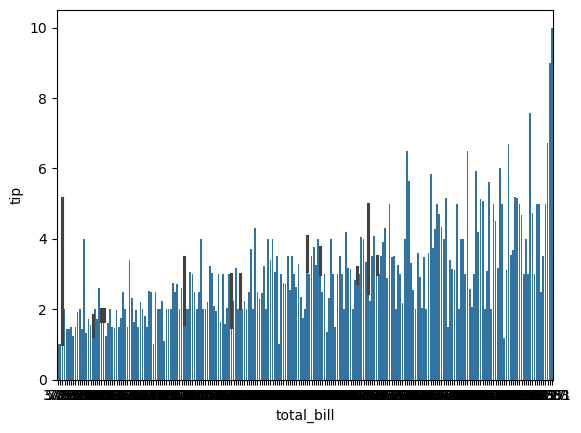

In [36]:
# Visualization
sns.barplot(x=dataset["total_bill"], y=dataset["tip"])
plt.show()

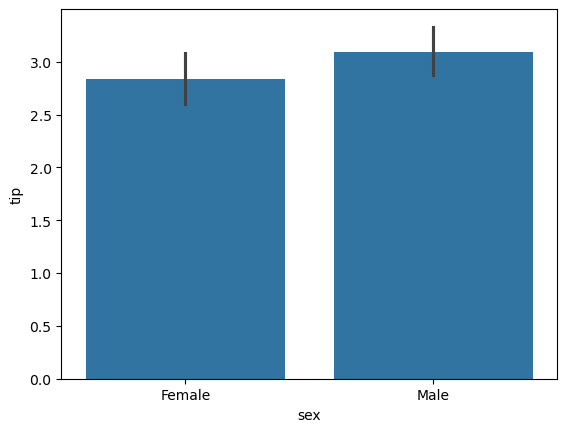

In [38]:
sns.barplot(x=dataset["sex"], y=dataset["tip"])
plt.show()sns.barplot(x=dataset["smoker"], y=dataset["tip"])
plt.show()

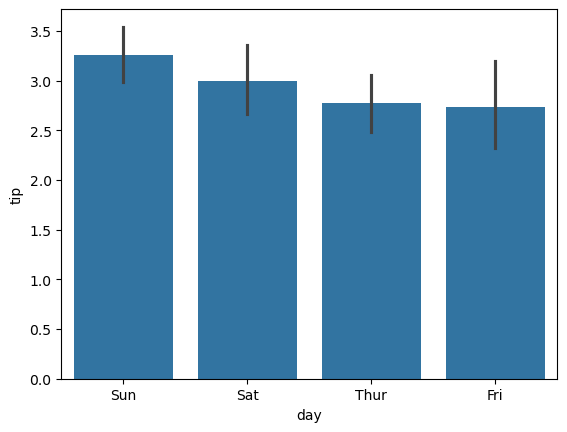

In [40]:
sns.barplot(x=dataset["day"], y=dataset["tip"])
plt.show()


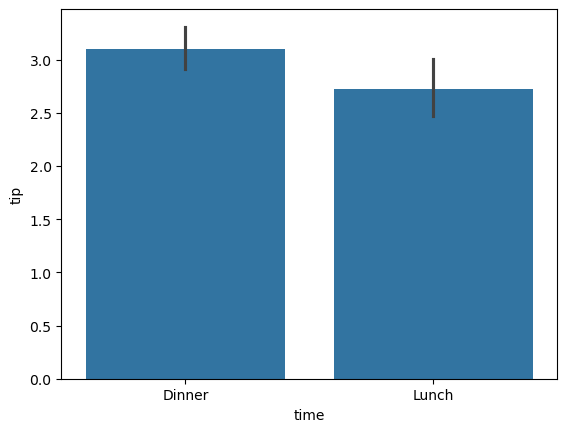

In [42]:

sns.barplot(x=dataset["time"], y=dataset["tip"])
plt.show()

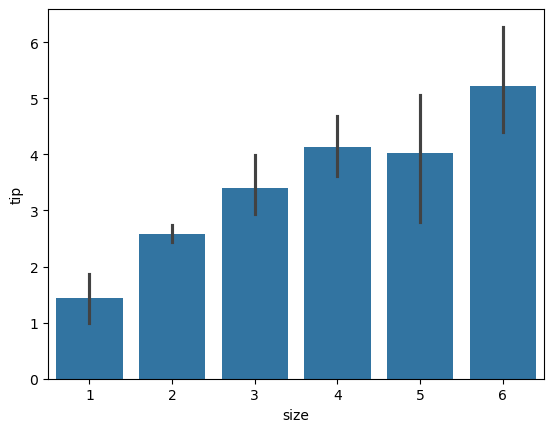

In [44]:
sns.barplot(x=dataset["size"], y=dataset["tip"])
plt.show()

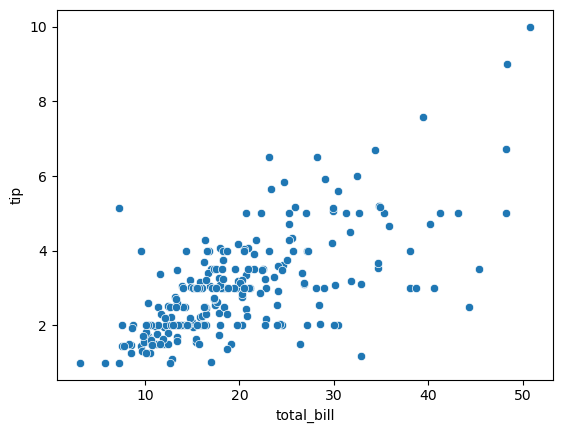

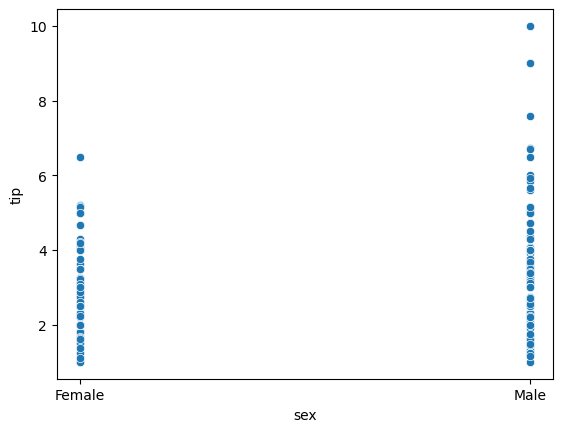

In [46]:
# Scatter plots
sns.scatterplot(x=dataset["total_bill"], y=dataset["tip"])
plt.show()

sns.scatterplot(x=dataset["sex"], y=dataset["tip"])
plt.show()

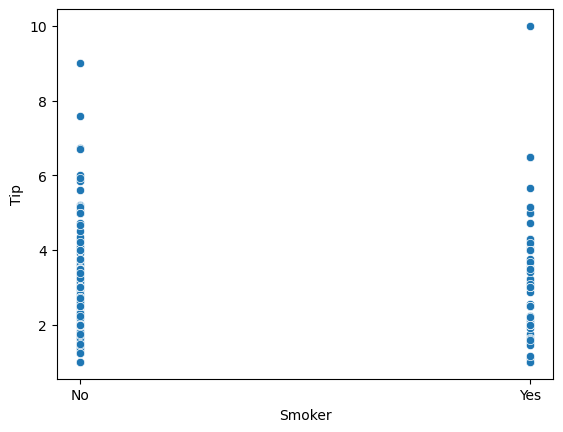

In [48]:
# Scatter plots for categorical variables
sns.scatterplot(x=dataset["smoker"], y=dataset["tip"])
plt.xlabel("Smoker")
plt.ylabel("Tip")
plt.show()

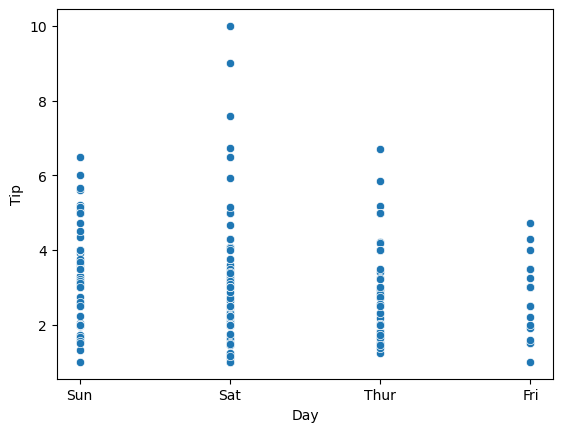

In [50]:
sns.scatterplot(x=dataset["day"], y=dataset["tip"])
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

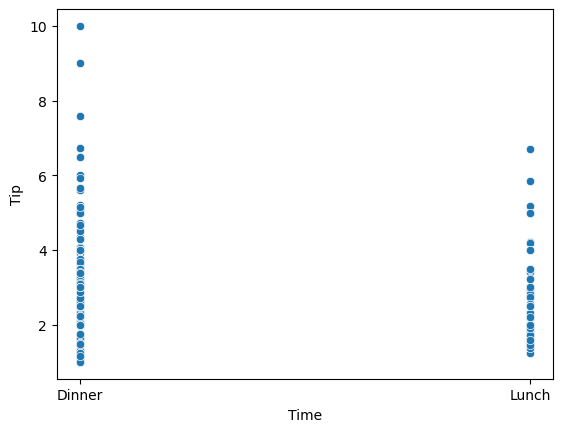

In [52]:
sns.scatterplot(x=dataset["time"], y=dataset["tip"])
plt.xlabel("Time")
plt.ylabel("Tip")
plt.show()

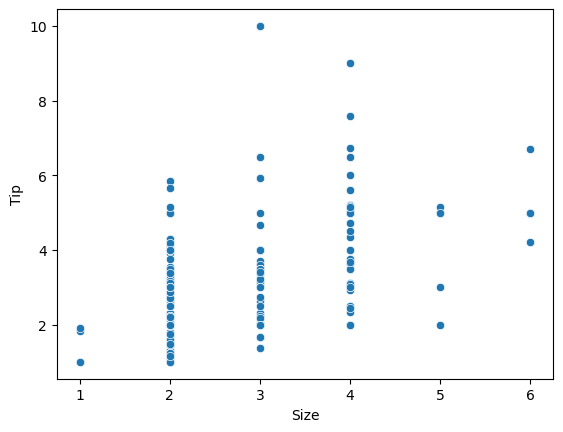

In [54]:
sns.scatterplot(x=dataset["size"], y=dataset["tip"])
plt.xlabel("Size")
plt.ylabel("Tip")
plt.show()

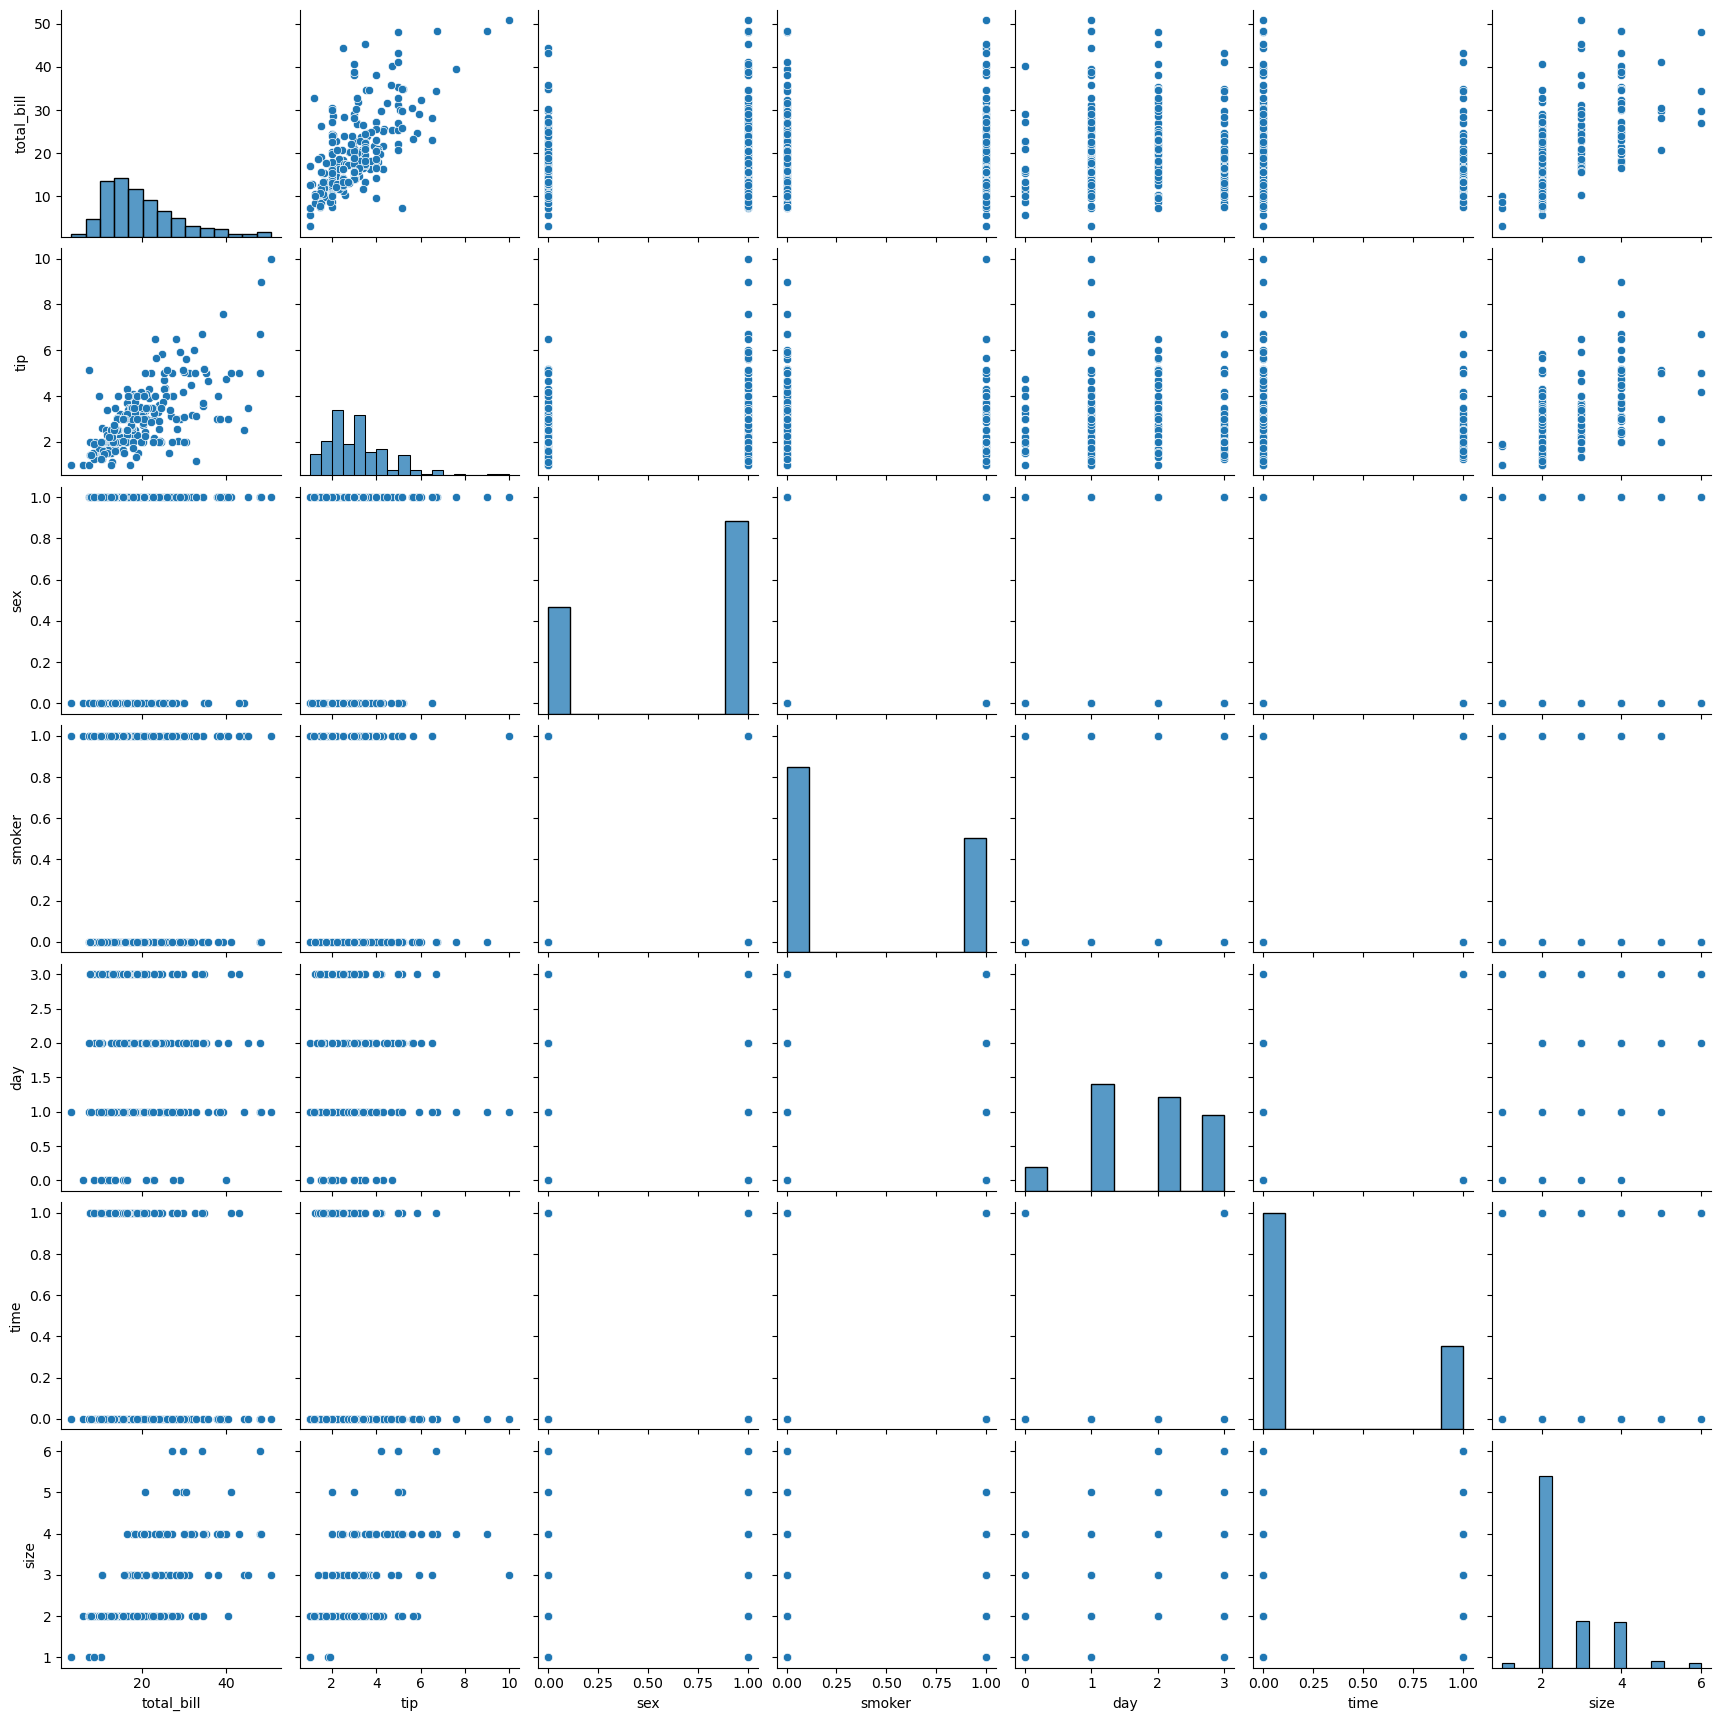

In [97]:
# Pair plot of the dataset
sns.pairplot(data)
plt.show()

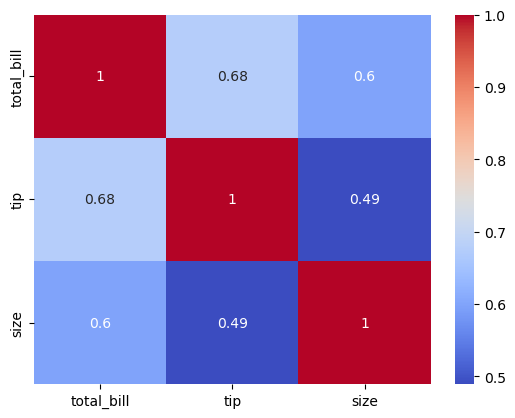

In [58]:
# Heatmap for correlations of selected features
corr_data = dataset[['total_bill', 'tip', 'size']].copy()
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [63]:
# Linear regression model with statsmodels
import statsmodels.api as sm
X_vars = data.drop(columns=["tip"])
X_vars = sm.add_constant(X_vars)
y_vals = dataset["tip"]

In [65]:
# Fit the linear regression model
lin_model = sm.OLS(y_vals, X_vars).fit()

In [67]:
# Rainbow test for linearity
from statsmodels.stats.diagnostic import linear_rainbow
rainbow_test_stat, rainbow_p_value = linear_rainbow(lin_model)

print(f"Rainbow Test Statistic: {rainbow_test_stat}")
print(f"P-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.2036274510126594
P-value: 0.15798464222013228


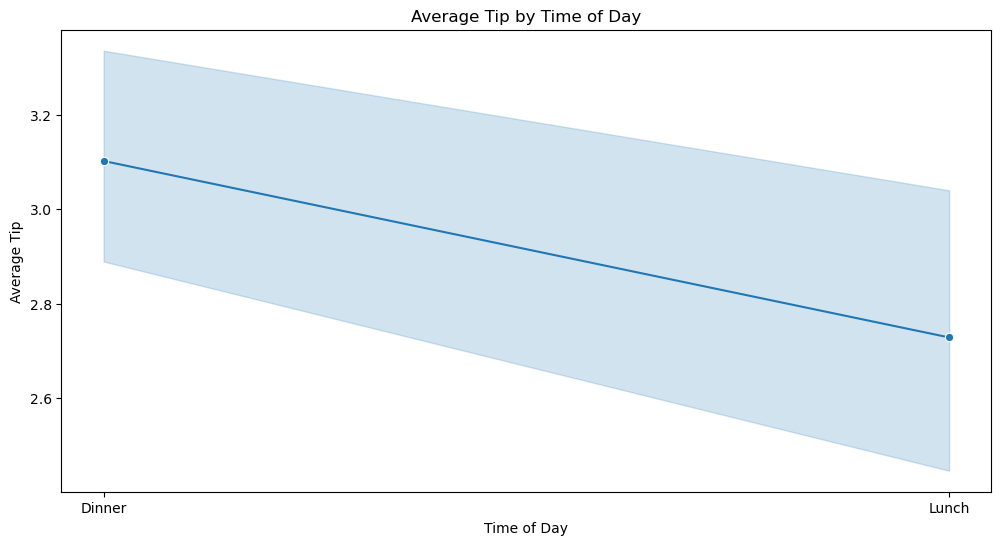

In [69]:
# Line plot for average tip by time
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x="time", y="tip", marker="o")
plt.title("Average Tip by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Tip")
plt.show()


In [73]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_title):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {model_title}")
    plt.show()

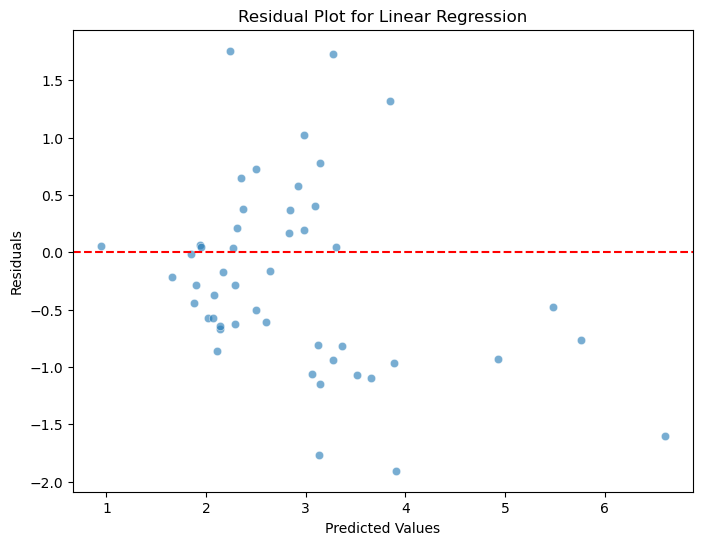

In [75]:
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

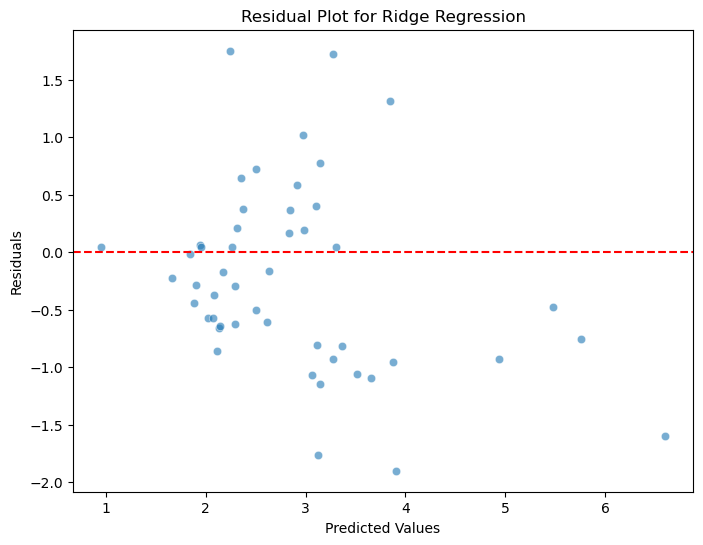

In [77]:
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

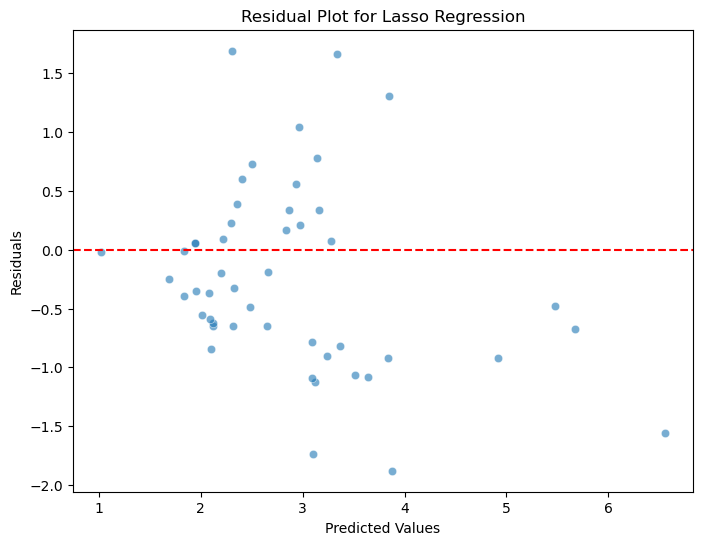

In [79]:
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

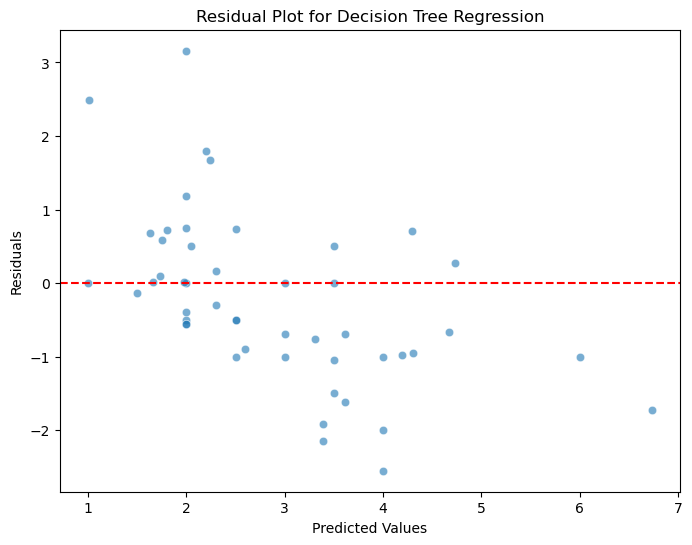

In [81]:
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")


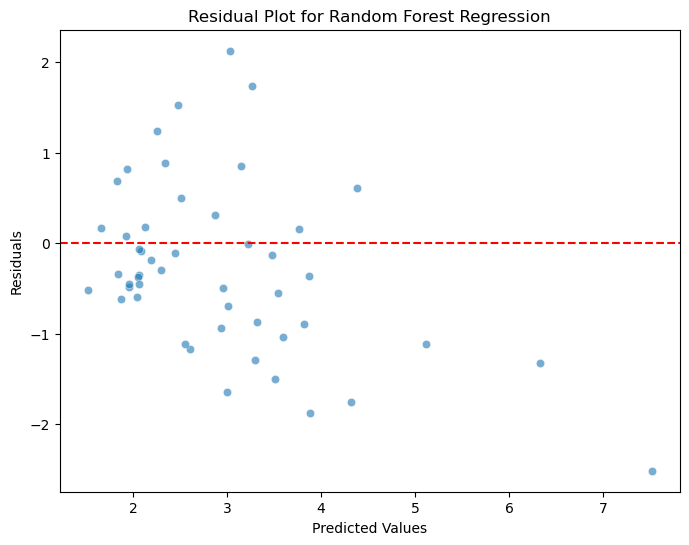

In [83]:
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")


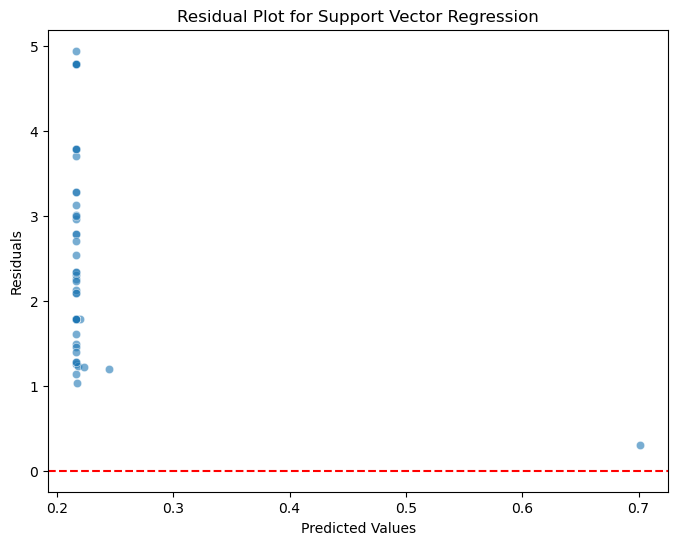

In [85]:
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression")


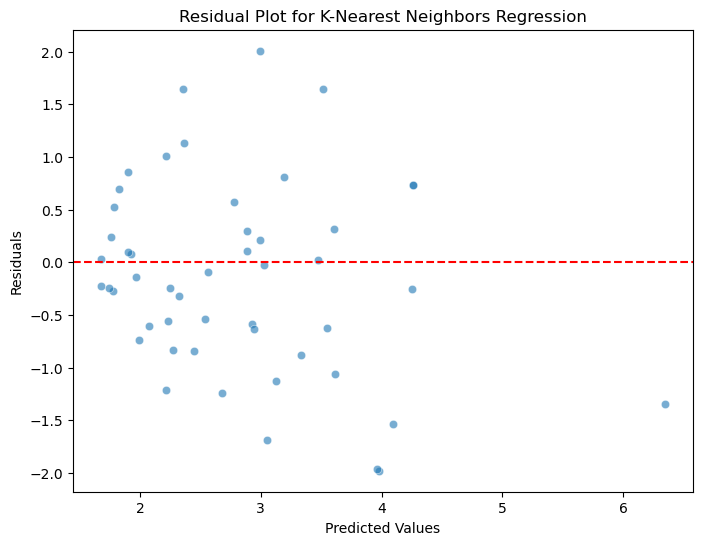

In [87]:
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")